## <center><b> Market Basket Analysis of Grocery data using Apriori Algorithm<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>

**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Installing & Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>

**5.** [**Data Pre-processing**](#Section5)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>

**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

- Apriori is an algorithm for **frequent itemset** mining and **association rule** learning over relational **databases**.

- It proceeds by **identifying** the **frequent** individual **items** in the database.

- It **extends** those **items** to larger and larger item sets as long as those item sets **appear** **sufficiently** often in the database.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- These days **data** is being **collected** and stored in **massive** amounts.

- Many **industries** are becoming **interested** in mining **patterns** from their databases.

- The **discovery** of interesting **correlation** relationships among **data** can help many business **decision-making** processes.

- These processes include **catalog design**, **cross-marketing**, and customer
shopping behavior **bold text** analysis.


<center><img src="https://miro.medium.com/max/1362/1*eyHUU0aKXJFRemOAW1rLTQ.png"></center>

<h4>Goal is to examine the transactional patterns of grocery purchase and discover obvious and non obvious patterns.</h4>

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The data set is based on the **sales of Grocery items** made in **[01-01-2014 to 31-10-2015]** and can be found in this <a href = "https://www.kaggle.com/heeraldedhia/groceries-dataset?select=Groceries_dataset.csv">**link**</a>.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 38765 | 3 | 908.7 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
|01| **Date** | Date of the transactions (YYYY-MM-DD format).| 
|02|**Member_number**|Membership number of Person who bought item.|
|03|**itemDescription**| Name of the item that was sold.|

In [2]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column, **statistics** are presented in an interactive HTML report.

In [7]:
profile = ProfileReport(df = df)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


### **Observation:**

- The report shows that there are a total of **3 features** out of which **2 are categorical** and **one is numerical**.

- There are **no missing values** but there exist **732 duplicated values (1.9%)**.

**Performing Operations**

In [8]:
before_shape = df.shape
print('Data Shape [Before]:', before_shape)

df.drop_duplicates(inplace = True)

after_shape = df.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 2) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (38765, 3)
Data Shape [After]: (38006, 3)
Drop Ratio: 2.0 %


**Observation:**

- We have **successfully handled duplicate data**.

In [9]:
df['itemDescription'] = df['itemDescription'].str.strip()
df['itemDescription'] = df['itemDescription'].str.lower()

In [10]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice
38764,1521,2014-12-26,cat food


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

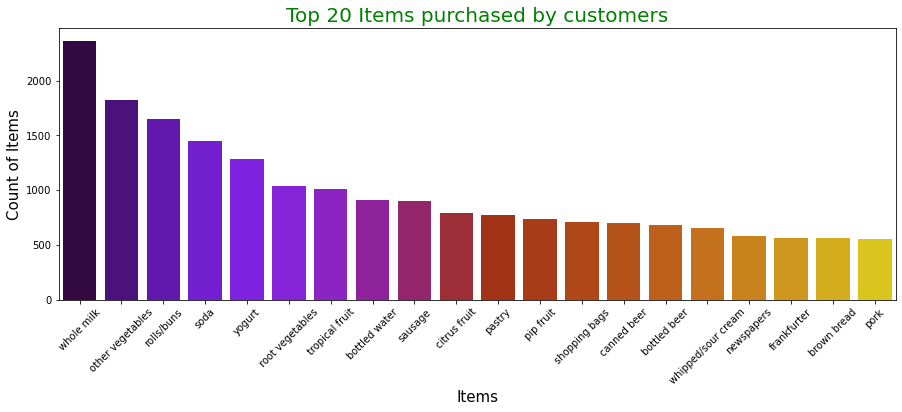

In [11]:
s = plt.figure(figsize=(15,5))
sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

**Observation:**

- We can see that **Whole Milk** and **other vegetables** are the **most sold** items in the Grocery Store

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

- Here we will **transform** our **data** concerning the **expected input** by Apriori.

- Each item inside the "**Item**" feature will **become** a **feature** and "**Member number**" feature will **become** an **index**.

In [12]:
from mlxtend.frequent_patterns import association_rules, apriori

In [13]:
transactions_str = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().reset_index(name ='Count')
transactions_str

,Member_number,itemDescription,Count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
...,...,...,...
34761,5000,onions,1
34762,5000,other vegetables,1
34763,5000,root vegetables,1
34764,5000,semi-finished bread,1


In [14]:
my_basket = transactions_str.pivot_table(index='Member_number', columns='itemDescription', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


- Next, we will **encode** our **feature** with **binary** data only.

- If any **feature** is found to have a value **greater than one** will be **set to 1**.

In [15]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- Firstly, we will **create** a set of **association rules** to **determine** the optimal **thresholds** for support and confidence. 

- If **`min_support`** is set **too low** then the **execution time** will **increase** and will end up having **a lot of rules** (**unnecessary**).

- Further, we will use **`confidence`** for __sorting__ purposes and to find the most important relationships.

In [16]:
frequent_items = apriori(my_basket_sets, min_support = 0.07,use_colnames = True)
frequent_items

,support,itemsets
0,0.119548,(beef)
1,0.079785,(berries)
2,0.158799,(bottled beer)
3,0.213699,(bottled water)
4,0.135967,(brown bread)
...,...,...
78,0.075680,"(yogurt, tropical fruit)"
79,0.079785,"(whipped/sour cream, whole milk)"
80,0.150590,"(yogurt, whole milk)"
81,0.082093,"(other vegetables, rolls/buns, whole milk)"


In [17]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,"(yogurt, other vegetables)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
86,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,0.014859,1.229837
70,(shopping bags),(whole milk),0.168291,0.458184,0.091329,0.542683,1.184422,0.014220,1.184772
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
84,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
...,...,...,...,...,...,...,...,...,...
91,(whole milk),"(other vegetables, rolls/buns)",0.458184,0.146742,0.082093,0.179171,1.220996,0.014859,1.039508
83,(whole milk),(whipped/sour cream),0.458184,0.154695,0.079785,0.174132,1.125650,0.008906,1.023536
21,(whole milk),(newspapers),0.458184,0.139815,0.072345,0.157895,1.129310,0.008284,1.021469
97,(whole milk),"(yogurt, other vegetables)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235


Visual Analysis of Association Rules

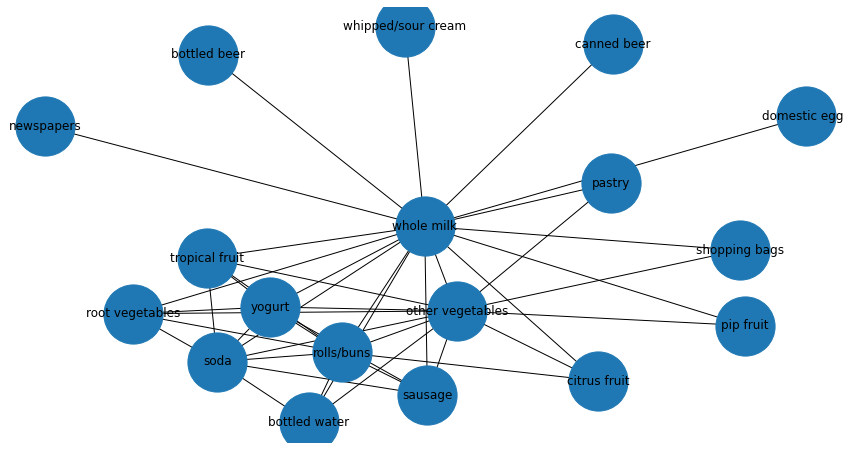

In [19]:
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))

fig, ax = plt.subplots(figsize = [15, 8])

GA = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')

nx.draw(GA,with_labels=True, node_size=3500, font_color='k')

**Observation:**

- **Whole Milk** is the **bestseller** of this **Grocery Store** and has an association with the respective items.

<a name = Section9></a>

---
# **9. Conclusion**
---

- There are a couple of **strategies** that this Grocery Store can **adopt** to increase sales.

- They need to **reconsider** the **allocation** of Whole Milk and its **constituent partners**.

- **Promotional discounts** in either of the **associated items** can entice customers to buy Whole Milk.

- Placing these **items close to Whole Milk** counter can be a **good strategy** to attract customers.
